# 3. HYPERPARAMETER OPTIMIZATION
---

- Values that affect the behavior and performance of a model that are unrelated to the data that's used are referred to as `hyperparameters`.
- The process of finding the optimal hyperparameter value is known as `hyperparameter optimization`.
- The most common technique is `grid search`:
    - selecting a subset of the possible hyperparameter values,
    - training a model using each of these hyperparameter values,
    - evaluating each model's performance,
    - selecting the hyperparameter value that resulted in the lowest error value.

## 1. Introducing the Data

The datasets I am using here are from the previous section (`Multivariate K-Nearest Neighbors`). The train and test sets were saved to csv and now are being loaded here. 

*Note:* For some reason the file type ended up being `file`, which is why I am not using `.csv` suffix below. I don't mind as long as it opens. 

In [1]:
import pandas as pd
import numpy as np

train_file = 'data/dc_train'
test_file = 'data/dc_test'
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
train.shape, test.shape

((2978, 8), (745, 8))

In [2]:
train.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,4.0,1.0,1.0,2.0,129.0,2.0,1125.0,15.0
1,4.0,1.0,1.0,1.0,295.0,1.0,1125.0,20.0
2,2.0,1.0,1.0,1.0,140.0,1.0,1125.0,9.0
3,5.0,2.0,2.0,3.0,217.0,3.0,730.0,19.0
4,6.0,2.0,1.0,2.0,150.0,2.0,35.0,15.0


In [3]:
test.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,4.0,1.0,1.0,1.0,100.0,1.0,1125.0,11.0
1,2.0,1.0,1.0,1.0,55.0,2.0,14.0,13.0
2,2.0,1.0,1.0,1.0,130.0,3.0,1125.0,0.0
3,4.0,0.0,1.0,2.0,95.0,1.0,1125.0,32.0
4,2.0,1.0,1.0,1.0,85.0,1.0,1125.0,29.0


In [4]:
X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

## 2. Optimizing k-Values

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_k = [1, 2, 3, 4, 5]
mse_values = list()

for k in hyper_k:
    knn = KNeighborsRegressor(n_neighbors=k, 
                              algorithm='brute', 
                              n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
mse_values

[21076.00268456376,
 14478.544966442953,
 12194.8730797912,
 10873.906124161074,
 10444.591946308725]

In [6]:
np.arange(1, 21)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [10]:
hyper_k = np.arange(1, 21)
mse_values = list()

for k in hyper_k:
    knn = KNeighborsRegressor(n_neighbors=k, 
                              algorithm='brute', 
                              n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
mse_values

[21076.00268456376,
 14478.544966442953,
 12194.8730797912,
 10873.906124161074,
 10444.591946308725,
 10078.445786726325,
 10037.488590604027,
 9913.83225671141,
 10099.830773054933,
 9911.227409395973,
 9930.585234899328,
 10049.399002609993,
 9905.503482784638,
 9875.4961991508,
 9896.299782252052,
 9842.40316170302,
 10111.368881354358,
 10069.095757726405,
 10131.399434828681,
 9899.53499328859]

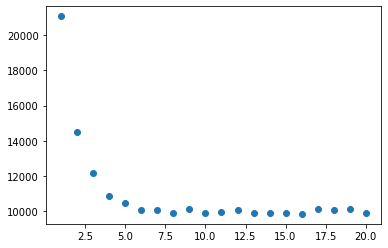

In [8]:
import matplotlib.pyplot as plt

plt.scatter(hyper_k, mse_values)
plt.show()

The lowest mse comes from k=16 at `9842`